<a href="https://colab.research.google.com/github/sidle34/allofthestuff/blob/Notebooks/RandomForestandSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Train and fine-tune a Random Forest for the Moons Dataset.**

# **Part 1**

Generate a moons dataset using make_moons(n_samples=10000, noise=0.4)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [ ]:
X,y=make_moons(n_samples=10000, noise=0.4, random_state=35)

In [ ]:
X

array([[ 0.46901218, -0.45238375],
       [ 0.86072524,  0.47163684],
       [-0.28491339,  0.23019092],
       ...,
       [ 2.03388331, -0.04082114],
       [ 0.90629142,  0.42022869],
       [ 1.03868323, -0.36452561]])

(array([[1.000e+00, 1.000e+00, 9.000e+00, 1.400e+01, 5.800e+01, 1.410e+02,
         2.150e+02, 3.010e+02, 3.640e+02, 4.210e+02, 4.640e+02, 5.470e+02,
         6.470e+02, 7.060e+02, 7.810e+02, 7.230e+02, 7.250e+02, 6.980e+02,
         5.990e+02, 5.050e+02, 5.000e+02, 4.320e+02, 3.620e+02, 3.330e+02,
         2.230e+02, 1.310e+02, 6.000e+01, 3.000e+01, 6.000e+00, 3.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 3.100e+01,
         6.800e+01, 1.430e+02, 3.170e+02, 5.220e+02, 7.450e+02, 8.650e+02,
         1.023e+03, 9.820e+02, 1.091e+03, 1.031e+03, 9.660e+02, 8.110e+02,
         6.210e+02, 4.030e+02, 2.340e+02, 9.000e+01, 4.100e+01, 6.000e+00,
         3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]),
 array([-2.44960057, -2.25942987, -2.06925916, -1.87908846, -1.68891776,
        -1.49874705, -1.30857635, -1.11840565, -0.92823494, -0.73806424,
        -0.54789353, -0.35772283, -0.16755213,  0.02261858,  0.21278928,
         0.40295999,  0.593

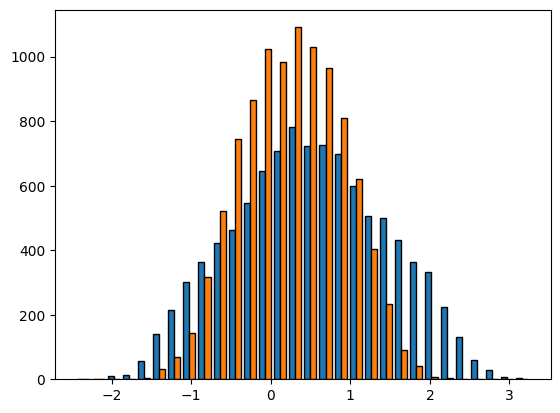

In [ ]:
plt.hist(X, bins=30, edgecolor='black')


X has a normal distribution, so no need to scale the data.

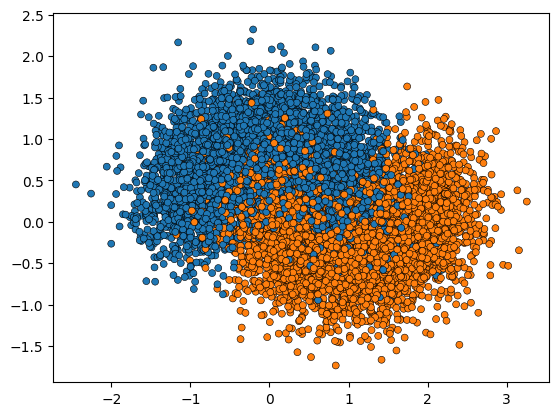

In [ ]:
sns.scatterplot(x= X[:,0], y=X[:, 1], hue=y, markers="o", s=25, edgecolor="k", legend=False)
plt.show()

# **Part 2**

Split it into a training set and a test set using train_test_split(). Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a RandomForestClassifier.

In [ ]:
#Split train and test sets
moonX_train, moonX_test, moony_train, moony_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Set up parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

#Set up the model and GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    refit=False
)

#Fit the model
grid_search.fit(moonX_train, moony_train)

#Print results for identified hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


# **Part 3**

Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

In [ ]:
#Retrain the model on the full training set using the best parameters
best_params = grid_search.best_params_
moon_best_rf = RandomForestClassifier(**best_params, random_state=42)
moon_best_rf.fit(moonX_train, moony_train)

#Measure performance on the test set
moony_pred = moon_best_rf.predict(moonX_test)
print("\nClassification Report:\n", classification_report(moony_test, moony_pred))

#Print accuracy results
moon_final_accuracy = accuracy_score(moony_test, moony_pred)
print("Accuracy with Best Parameters:", moon_final_accuracy)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1001
           1       0.88      0.85      0.86       999

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Accuracy with Best Parameters: 0.8645


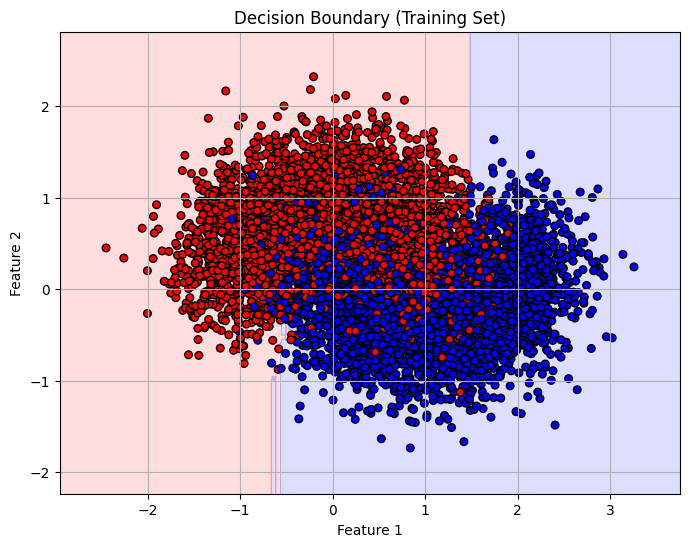

In [ ]:
#Visualize boundaries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, title="Decision Boundary"):
    # Set up grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

    # Predict on grid points
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision surface
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Example usage
plot_decision_boundary(moon_best_rf, moonX_train, moony_train, title="Decision Boundary (Training Set)")


# **Train and fine-tune a SVM for the Heart Disease DataSet.**

# **Part 4**

Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a SVC(). (Kernel and C values)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Heart_disease_cleveland_new.csv to Heart_disease_cleveland_new.csv


In [ ]:
heart = pd.read_csv("Heart_disease_cleveland_new.csv")

In [ ]:
# Separate features and target
heartX = heart.drop("target", axis=1)
hearty = heart["target"]

In [ ]:
heartX

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1


In [ ]:
heartX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [ ]:
hearty

,target
0,0
1,1
2,1
3,0
4,0
...,...
298,1
299,1
300,1
301,1


In [ ]:
hearty.info()

<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: target
Non-Null Count  Dtype
--------------  -----
303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [ ]:
# Split into training and test sets
heartX_train, heartX_test, hearty_train, hearty_test = train_test_split(heartX, hearty, test_size=0.2, random_state=42)

In [ ]:
#Set up parameter grid
svc=SVC()
param_grid_heart = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100]
}

#Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid_heart,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    refit=False
)

#Fit the model
grid_search.fit(heartX_train, hearty_train)

#Print results for identified hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.1, 'kernel': 'linear'}


In [ ]:
#Retrain the model on the full training set using the best parameters
best_params = grid_search.best_params_
heart_best_svc = SVC(**best_params)
heart_best_svc.fit(heartX_train, hearty_train)

#Measure performance on the test set
hearty_pred = heart_best_svc.predict(heartX_test)
print("\nClassification Report:\n", classification_report(hearty_test, hearty_pred))

#Print accuracy results
heart_final_accuracy = accuracy_score(hearty_test, hearty_pred)
print("Accuracy with Best Parameters:", heart_final_accuracy)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Accuracy with Best Parameters: 0.9016393442622951
